In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

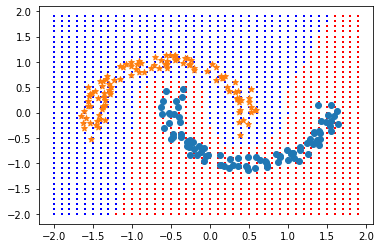

In [55]:
data = pd.read_csv("D2z.txt", sep=" ")
X = data.iloc[:,:-1].values
y = data.iloc[:,[-1]].astype(int).values.ravel()
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X,y)

G = np.mgrid[-2:2:0.1, -2:2:0.1].reshape(2,-1).T
Pg = clf.predict(G)
plt.scatter(G[:,0][Pg==0], G[:,1][Pg==0], marker='+', c='red', s=3)
plt.scatter(G[:,0][Pg==1], G[:,1][Pg==1], marker='+', c='blue', s=3)

P = clf.predict(X)
plt.scatter(X[:,0][P==0], X[:,1][P==0], marker='o')
plt.scatter(X[:,0][P==1], X[:,1][P==1], marker='*')

In [2]:
data = pd.read_csv("emails.csv", sep=",")
X = data.iloc[:,1:-1].values
y = data.iloc[:,[-1]].astype(int).values.ravel()

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
kf=KFold(n_splits=5, random_state=None, shuffle=False)
    

In [83]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    P = clf.predict(X_test)
    acc = round(accuracy_score(y_test, P), 2)
    prec = round(precision_score(y_test, P), 2)
    recall = round(recall_score(y_test, P), 2)
    print('accuracy: ', acc, '    precision: ', prec, '    recall: ', recall)

accuracy:  0.82     precision:  0.65     recall:  0.82
accuracy:  0.86     precision:  0.69     recall:  0.87
accuracy:  0.86     precision:  0.72     recall:  0.83
accuracy:  0.85     precision:  0.72     recall:  0.82
accuracy:  0.78     precision:  0.61     recall:  0.76


In [84]:
from sklearn.linear_model import LogisticRegression

In [87]:
clf = LogisticRegression(random_state=0, tol=1e-6, max_iter=1000)

In [88]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    P = clf.predict(X_test)
    acc = round(accuracy_score(y_test, P), 2)
    prec = round(precision_score(y_test, P), 2)
    recall = round(recall_score(y_test, P), 2)
    print('accuracy: ', acc, '    precision: ', prec, '    recall: ', recall)

accuracy:  0.97     precision:  0.93     recall:  0.98
accuracy:  0.97     precision:  0.94     recall:  0.96
accuracy:  0.97     precision:  0.93     recall:  0.96
accuracy:  0.96     precision:  0.93     recall:  0.93
accuracy:  0.94     precision:  0.89     recall:  0.92


D:\PROGRAMS\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
K=[1,3,5,7,10]
accuracies=[]
for i in range(5):
    clf=neighbors.KNeighborsClassifier(n_neighbors=K[i])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        P = clf.predict(X_test)
        acc = round(accuracy_score(y_test, P), 2)
        accuracies.append(acc)

In [4]:
avgs=[]
for j in range(5):
    avg=np.average(accuracies[(j*5):((j+1)*5)])
    avgs.append(avg)

Text(0, 0.5, 'average accuracy')

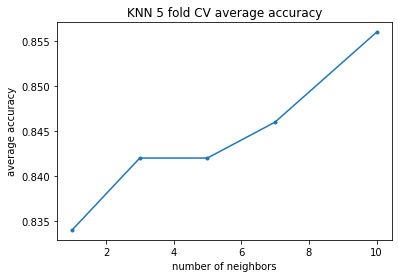

In [5]:
plt.plot(K, avgs, '.-')
plt.title('KNN 5 fold CV average accuracy')
plt.xlabel('number of neighbors')
plt.ylabel('average accuracy')

In [107]:
clf_knn=neighbors.KNeighborsClassifier(n_neighbors=5)
clf_log=clf = LogisticRegression(random_state=0, tol=1e-6, max_iter=1000)

In [135]:
score1=clf_knn.fit(X_train, y_train).predict_proba(X_test)[:,1]
score2=clf_log.fit(X_train, y_train).decision_function(X_test)

D:\PROGRAMS\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
from sklearn.metrics import roc_curve, auc

In [137]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, score1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, score2)

In [145]:
auc1=round(auc(fpr1, tpr1), 2)
auc2=round(auc(fpr2, tpr2), 2)
print(auc1, auc2)

0.85 0.98


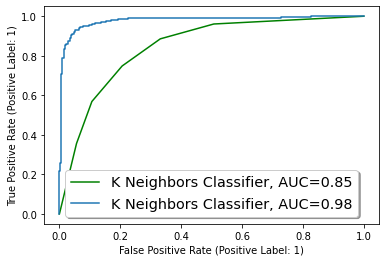

In [153]:
fig, ax = plt.subplots()
plt.plot(fpr1, tpr1, color='green', label='K Neighbors Classifier, AUC=0.85')
plt.plot(fpr2, tpr2, label='K Neighbors Classifier, AUC=0.98')
legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel('False Positive Rate (Positive Label: 1)')
plt.ylabel('True Positive Rate (Positive Label: 1)')
# legend.get_frame().set_facecolor('C1')
plt.show()